In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_warehouse = pd.read_csv(r'C:\Users\U S E R\Downloads\datasets\output\warehouse_scorecard.csv')

In [4]:
df_warehouse.head()


,origin_warehouse,shipment_count,d_delivered_pp,d_delay_pp,d_return_pp,d_cost_per_unit_pct,d_cost_per_kg_pct,flag_count,priority_score
0,Warehouse_HOU,212,-2.68,1.84,1.23,13.03,26.58,4,848
1,Warehouse_SF,215,-3.80,1.21,1.66,-1.29,11.41,3,645
2,Warehouse_MIA,201,-4.29,1.49,-0.11,0.33,19.22,3,603
3,Warehouse_ATL,207,-3.66,0.68,-0.15,-2.68,-4.20,2,414
4,Warehouse_SEA,190,2.34,-0.48,1.03,2.74,24.62,2,380


In [5]:
df_carrier = pd.read_csv(r'C:\Users\U S E R\Downloads\datasets\output\carrier_scorecard.csv')
df_destination = pd.read_csv(r'C:\Users\U S E R\Downloads\datasets\output\destination_scorecard.csv')

In [6]:
df_carrier.head(), df_destination.head(), df_warehouse.head()


(     carrier  shipments  cost_per_unit  avg_transit_days  delay_rate  \
 0  LaserShip        303         203.06              4.04        8.58   
 1     OnTrac        299         182.13              4.12        9.70   
 2      FedEx        295         217.23              4.30        8.81   
 3       USPS        292         175.78              4.05        7.19   
 4        DHL        281         217.39              4.27       13.88   
 
    returned_rate  delivered_rate            carrier_position  
 0           1.98           81.85       FAST and CHEAP (best)  
 1           2.34           82.94       FAST and CHEAP (best)  
 2           2.37           82.71  SLOW and EXPENSIVE (worst)  
 3           1.37           81.85       FAST and CHEAP (best)  
 4           0.71           82.21  SLOW and EXPENSIVE (worst)  ,
   origin_warehouse destination  shipments  cost_per_unit  avg_transit_days  \
 0     Warehouse_LA    New York         22         200.75              4.05   
 1    Warehouse_M

In [6]:
df_carrier.head(), df_destination.head(), df_warehouse.head()


(     carrier  shipments  cost_per_unit  avg_transit_days  delay_rate  \
 0  LaserShip        303         203.06              4.04        8.58   
 1     OnTrac        299         182.13              4.12        9.70   
 2      FedEx        295         217.23              4.30        8.81   
 3       USPS        292         175.78              4.05        7.19   
 4        DHL        281         217.39              4.27       13.88   
 
    returned_rate  delivered_rate            carrier_position  
 0           1.98           81.85       FAST and CHEAP (best)  
 1           2.34           82.94       FAST and CHEAP (best)  
 2           2.37           82.71  SLOW and EXPENSIVE (worst)  
 3           1.37           81.85       FAST and CHEAP (best)  
 4           0.71           82.21  SLOW and EXPENSIVE (worst)  ,
   origin_warehouse destination  shipments  cost_per_unit  avg_transit_days  \
 0     Warehouse_LA    New York         22         200.75              4.05   
 1    Warehouse_M

In [32]:
df_carrier.head()

,carrier,shipments,cost_per_unit,avg_transit_days,delay_rate,returned_rate,delivered_rate,carrier_position
0,LaserShip,303,203.06,4.04,8.58,1.98,81.85,FAST and CHEAP (best)
1,OnTrac,299,182.13,4.12,9.70,2.34,82.94,FAST and CHEAP (best)
2,FedEx,295,217.23,4.30,8.81,2.37,82.71,SLOW and EXPENSIVE (worst)
3,USPS,292,175.78,4.05,7.19,1.37,81.85,FAST and CHEAP (best)
4,DHL,281,217.39,4.27,13.88,0.71,82.21,SLOW and EXPENSIVE (worst)


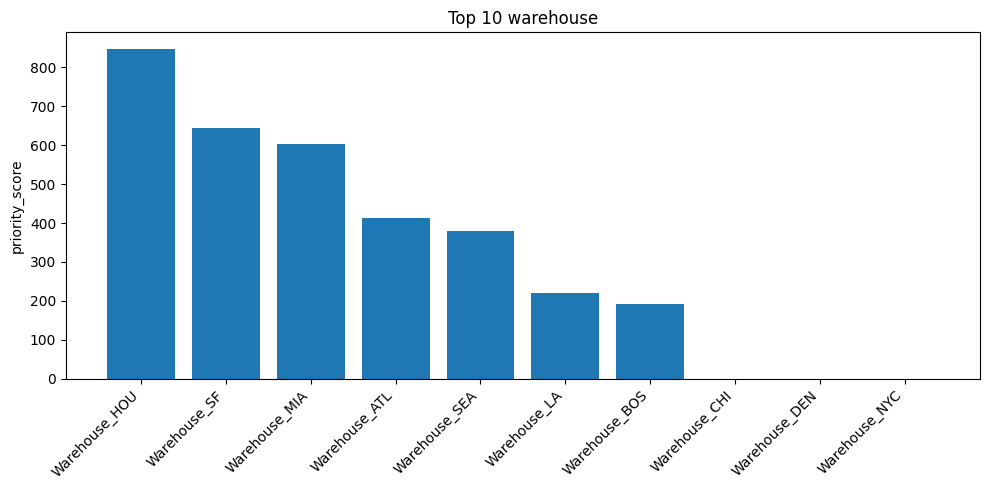

In [17]:
top_w = df_warehouse.sort_values('priority_score', ascending = False).head(10)

plt.figure(figsize = (10,5))
plt.bar(top_w['origin_warehouse'], top_w['priority_score'])
plt.xticks(rotation = 45, ha='right')
plt.title('Top 10 warehouse')
plt.ylabel('priority_score')
plt.tight_layout()
plt.show()

# saving
plt.figure(figsize = (10,4))
plt.bar(top_w['origin_warehouse'], top_w['priority_score'])
plt.xticks(rotation = 45, ha='right')
plt.title('Top 10 warehouse')
plt.ylabel('priority_score')
plt.tight_layout()
plt.savefig(r'C:\Users\U S E R\Downloads\datasets\output\warehouse_score.png', dpi=160)
plt.close()
    

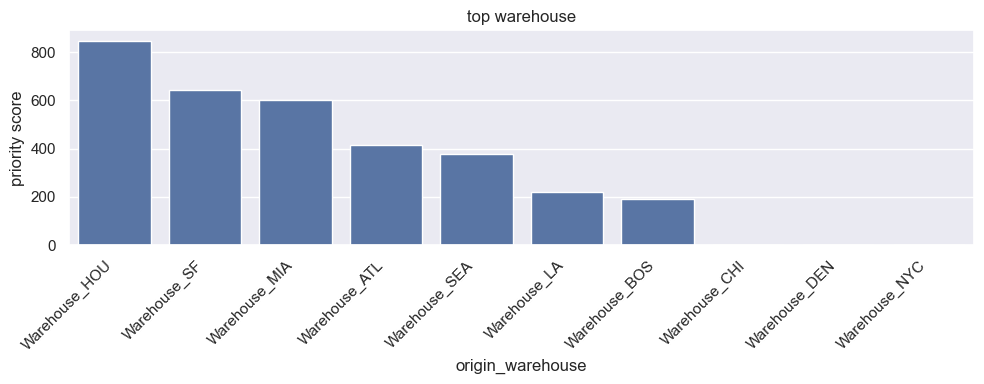

In [19]:
import seaborn as sns
sns.set_theme()

top_w = df_warehouse.sort_values('priority_score', ascending = False).head(10)

plt.figure(figsize=(10,4))
sns.barplot(data = top_w, x = 'origin_warehouse', y='priority_score')
plt.xticks(rotation = 45, ha = 'right')
plt.title('top warehouse')
plt.ylabel('priority score')
plt.tight_layout()
plt.show()


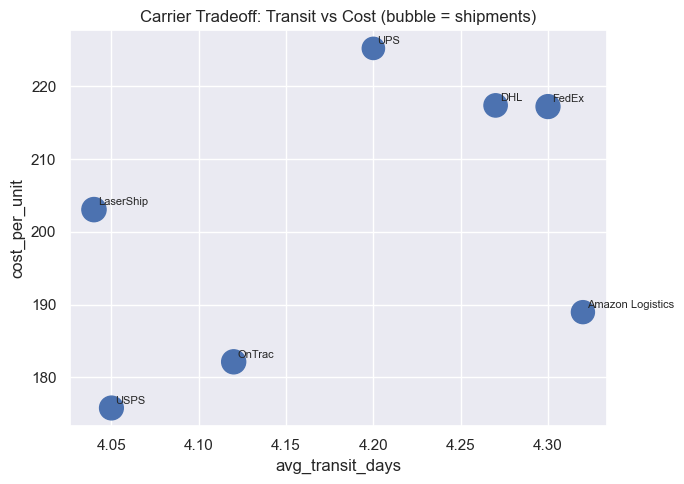

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(
    df_carrier["avg_transit_days"],
    df_carrier["cost_per_unit"],
    s=df_carrier["shipments"]  # bubble size
)

# label qo'yish
for _, r in df_carrier.iterrows():
    plt.annotate(
        r["carrier"],
        (r["avg_transit_days"], r["cost_per_unit"]),
        xytext=(3,3),
        textcoords="offset points",
        fontsize=8
    )

plt.title("Carrier Tradeoff: Transit vs Cost (bubble = shipments)")
plt.xlabel("avg_transit_days")
plt.ylabel("cost_per_unit")
plt.tight_layout()
plt.show()


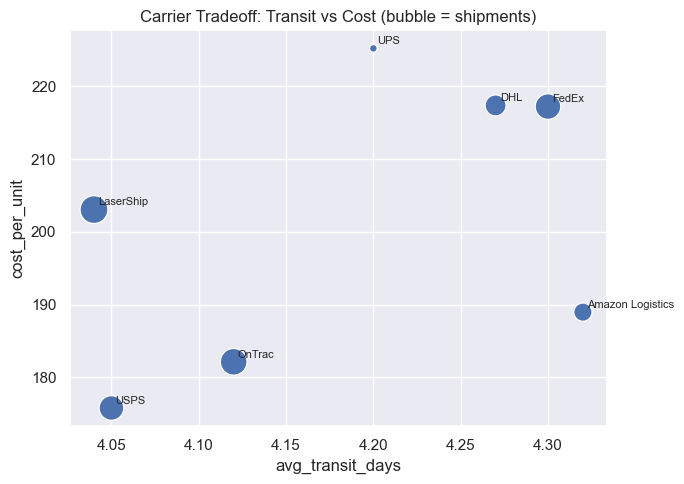

In [34]:
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_carrier,
    x="avg_transit_days",
    y="cost_per_unit",
    size="shipments",
    sizes=(30, 400),
    legend=False
)

for _, r in df_carrier.iterrows():
    plt.annotate(r["carrier"], (r["avg_transit_days"], r["cost_per_unit"]),
                 xytext=(3,3), textcoords="offset points", fontsize=8)

plt.title("Carrier Tradeoff: Transit vs Cost (bubble = shipments)")
plt.tight_layout()
plt.show()


In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data = df_carrier,
    x = 'avg_transit_days',
    y = 'cost_per_unit',
    size = 'shipments',
    sizes = (30,400),
    legend = False
)
for _,r in df_carrier.iterrows():
    plt.annotate(
        r['carrier'],
        (r['avg_transit_days'], r['cost_per_unit']),
        xytext = (3,3),
        textcoords = 'offset points',
        fontsize = 8
    )
plt.title('Carrier Tradeoffs: Transit vs Cost(bubble = shipments)')
plt.xlabel('transit days')
plt.ylabel('cost per unit')
plt.tight_layout()
plt.savefig(r'C:\Users\U S E R\Downloads\datasets\output\carrier_score.png', dpi=160)
plt.close()

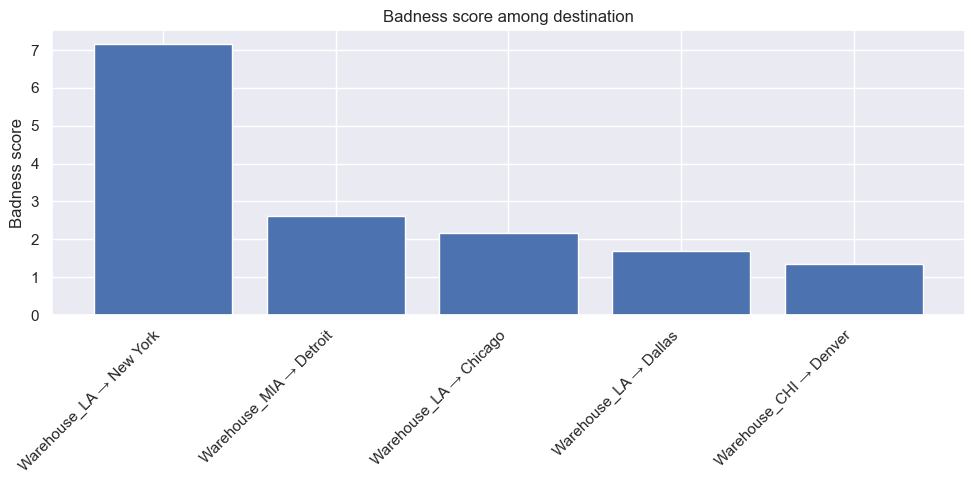

In [41]:
#badness score on destination
top_r  = df_destination.sort_values('badness_score', ascending = False).head(10).copy()
top_r["lane"] = top_r["origin_warehouse"].astype(str) + " → " + top_r["destination"].astype(str)

plt.figure(figsize=(10,5))
plt.bar(top_r['lane'], top_r['badness_score'])
plt.xticks(rotation = 45, ha = 'right')
plt.title("Badness score among destination")
plt.ylabel("Badness score")
plt.tight_layout()
plt.show()

top_r  = df_destination.sort_values('badness_score', ascending = False).head(10).copy()
top_r["lane"] = top_r["origin_warehouse"].astype(str) + " → " + top_r["destination"].astype(str)

plt.figure(figsize=(10,5))
plt.bar(top_r['lane'], top_r['badness_score'])
plt.xticks(rotation = 45, ha = 'right')
plt.title("Badness score among destination")
plt.ylabel("Badness score")
plt.tight_layout()
plt.savefig(r'C:\Users\U S E R\Downloads\datasets\output\des_score.png', dpi=160)
plt.show()



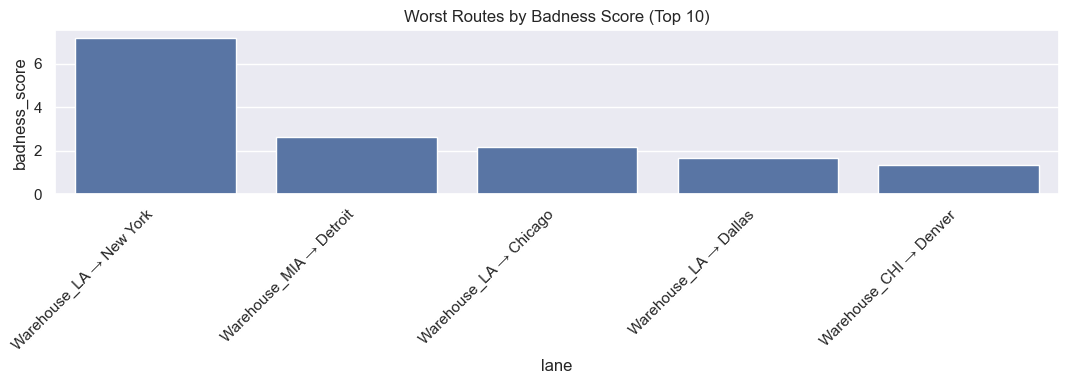

In [43]:
import seaborn as sns
sns.set_theme()

top_r = df_destination.sort_values("badness_score", ascending=False).head(10).copy()
top_r["lane"] = top_r["origin_warehouse"].astype(str) + " → " + top_r["destination"].astype(str)

plt.figure(figsize=(11,4))
sns.barplot(data=top_r, x="lane", y="badness_score")
plt.xticks(rotation=45, ha="right")
plt.title("Worst Routes by Badness Score (Top 10)")
plt.tight_layout()
plt.show()
